In [18]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
from matplotlib.pyplot import title
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to

if os.path.isfile("emissions.csv"):
    filepath = "emissions.csv"
    print("loading from file")
    emissions_data = pd.read_csv(filepath)
    print("done")
else:
    print("Can't find dataset")

loading from file
done


In [19]:
for x in emissions_data:
    print(x)

report_id
report_year
facility_id
jurisdiction_code
jurisdiction_facility_id
facility_name
registered_business_name
primary_anzsic_class_code
primary_anzsic_class_name
substance_id
substance_sort_order
substance_name
air_point_emission_kg
air_point_eet
air_fugitive_emission_kg
air_fugitive_eet
air_total_emission_kg
water_emission_kg
water_eet
land_emission_kg
land_eet
suburb
state
postcode
latitude
longitude
pivot_facility_name


Types of emissions

Ethanol
Total Volatile Organic Compounds
Ammonia (total)
Carbon monoxide
Oxides of Nitrogen
Particulate Matter ≤2.5 µm (PM2.5)
Particulate Matter ≤10.0 µm (PM10)
Polycyclic aromatic hydrocarbons (B[a]Peq)
Sulfur dioxide
Acetone
Acetonitrile
Acrylonitrile (2-propenenitrile)
Antimony & compounds
Arsenic & compounds
Benzene
Beryllium & compounds
Cadmium & compounds
Carbon disulfide
Chlorine & compounds
Chloroethane (ethyl chloride)
Chloroform (trichloromethane)
Chlorophenols (di, tri, tetra)
Chromium (III) compounds
Chromium (VI) compounds
Copper & compounds
Cumene (1-methylethylbenzene)
Cyclohexane
1,2-Dichloroethane
Dichloromethane
Ethyl acetate
Ethylbenzene
Formaldehyde (methyl aldehyde)
n-Hexane
Hydrochloric acid
Hydrogen sulfide
Lead & compounds
Mercury & compounds
Methyl ethyl ketone
Methyl isobutyl ketone
Nickel & compounds
Phenol
Polychlorinated dioxins and furans (TEQ)
Styrene (ethenylbenzene)
Tetrachloroethylene
Toluene (methylbenzene)
1,1,2-Trichloroethane
Trichloroethylene
Vin

<AxesSubplot:>

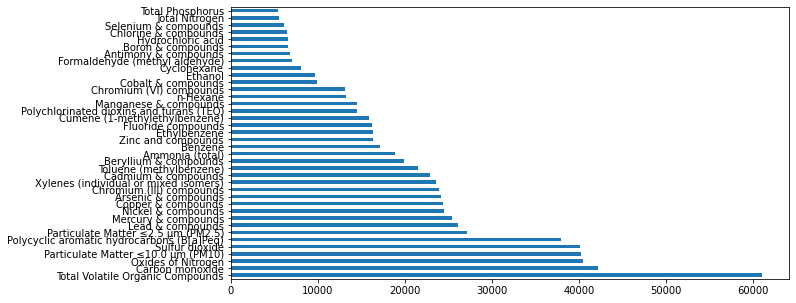

In [20]:


emissions_data.columns
row_one = emissions_data.iloc[1]
#print(row_one)
row_one['primary_anzsic_class_name']

list_substance_name = []

#print(emissions_data['substance_name'].value_counts())
for x in emissions_data['substance_name']:
    if x not in list_substance_name:
        list_substance_name.append(x)
for x in list_substance_name:
    print(x)

substance_tally = emissions_data['substance_name'].value_counts()
substance_tally[substance_tally > 5000].plot(kind = "barh")


Industries That Produce Emissions

AVERAGE
                                              Industry  Average
90   Copper, Silver, Lead and Zinc Smelting and Ref...  1799208
35               Iron Smelting and Steel Manufacturing  1317701
32                                  Aluminium Smelting  1294245
31                                  Alumina Production   254328
20                  Fossil Fuel Electricity Generation   254299
50                                     Iron Ore Mining   253267
39                   Laundry and Dry-Cleaning Services   212244
13     Other Non-Metallic Mineral Mining and Quarrying   178431
30                                      Bauxite Mining   174458
10                                         Coal Mining   163351
78         Other Basic Non-Ferrous Metal Manufacturing   150846
2                   Beef Cattle Feedlots (Specialised)   143112
22                            Fertiliser Manufacturing   132641
64                                   Nickel Ore Mining   130109
88                              

Text(0, 0.5, 'Average')

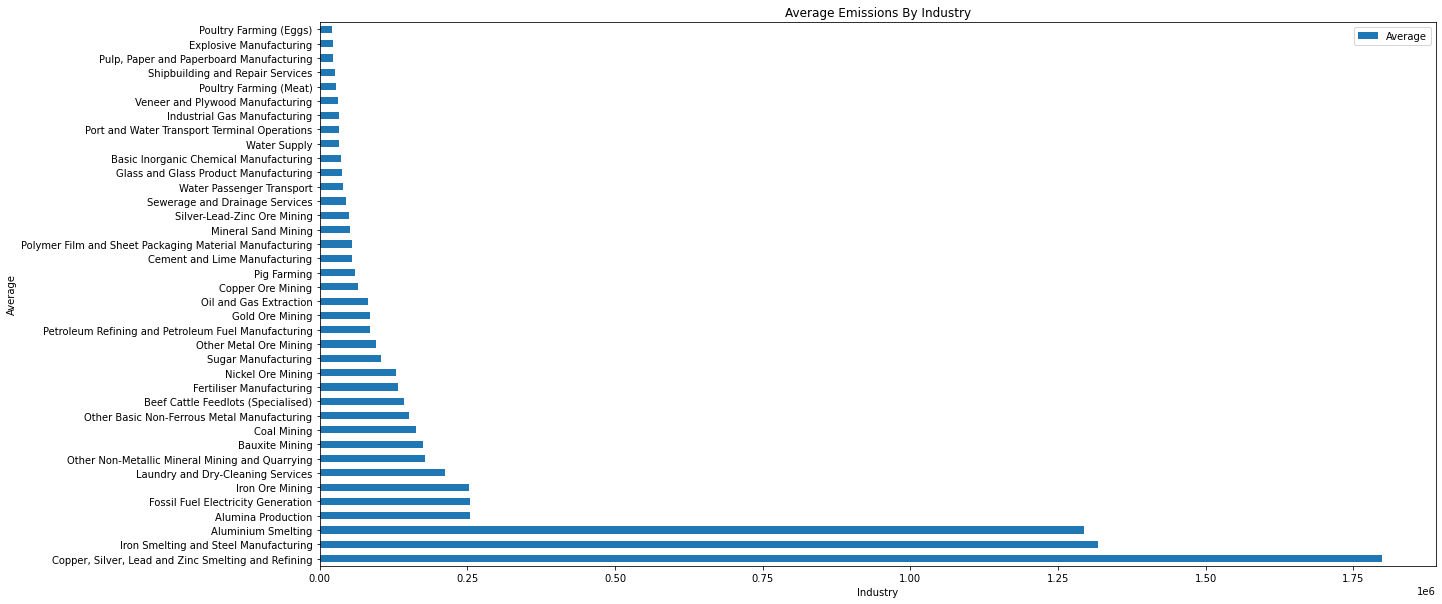

In [48]:

dataheading = 'primary_anzsic_class_name'
year = '2020/2021'
len_dataset_rows_temp = 0
dict_emissions_by_industry = {}
industry_list = []
average_list = []
total_list = []

df_emissions_by_industry_average = {}
df_emissions_by_industry_total = {}

def append_value(append_from_this_heading, row_number, to_dictionary):
    if row_number['report_year'] == year:
        try: #Turn this into a function
            if not pd.isna(row_number[append_from_this_heading]):
                appendthis = float(row_number[append_from_this_heading])
                to_dictionary[row_number[dataheading]].append(appendthis)
        except ValueError:
            print("NG")

for x in emissions_data["report_year"]:
    len_dataset_rows_temp += 1
    if x == year:
        len_dataset_rows = len_dataset_rows_temp


for x in range(0, len_dataset_rows):
    rows = emissions_data.iloc[x]
    if rows[dataheading] not in dict_emissions_by_industry:
        dict_emissions_by_industry[rows[dataheading]] = []

    append_value("air_total_emission_kg", rows, dict_emissions_by_industry)
    append_value("water_emission_kg", rows, dict_emissions_by_industry)
    append_value("land_emission_kg", rows, dict_emissions_by_industry)

for x in dict_emissions_by_industry:
    industry_list.append(x)
    average_emissions = int(sum(dict_emissions_by_industry[x])/len(dict_emissions_by_industry[x]))
    total_emissions = int(sum(dict_emissions_by_industry[x]))

    average_list.append(average_emissions)
    total_list.append(total_emissions)


df_emissions_by_industry_average["Industry"] = industry_list
df_emissions_by_industry_average["Average"] = average_list

df_emissions_by_industry_total["Industry"] = industry_list
df_emissions_by_industry_total["Total"] = total_list

print("AVERAGE")
df_average=pd.DataFrame(df_emissions_by_industry_average)
average_sort = df_average.sort_values(by="Average", ascending=False)
is_top = average_sort["Average"] >= 20000
print(average_sort[is_top])
average_sort[is_top].plot(x ="Industry", y="Average", kind = "barh", figsize=(20,10))
plt.title("Average Emissions By Industry")
plt.xlabel("Industry")
plt.ylabel("Average")

#df_total=pd.DataFrame(df_emissions_by_industry_total)
#total_sort = df_total.sort_values(by="Total", ascending=False)
#print(total_sort.head(20))
#total_sort.plot(x = "Industry", y="Total", kind = "line")

Error
AVERAGE
Industry
Total


Text(0, 0.5, 'Industry')

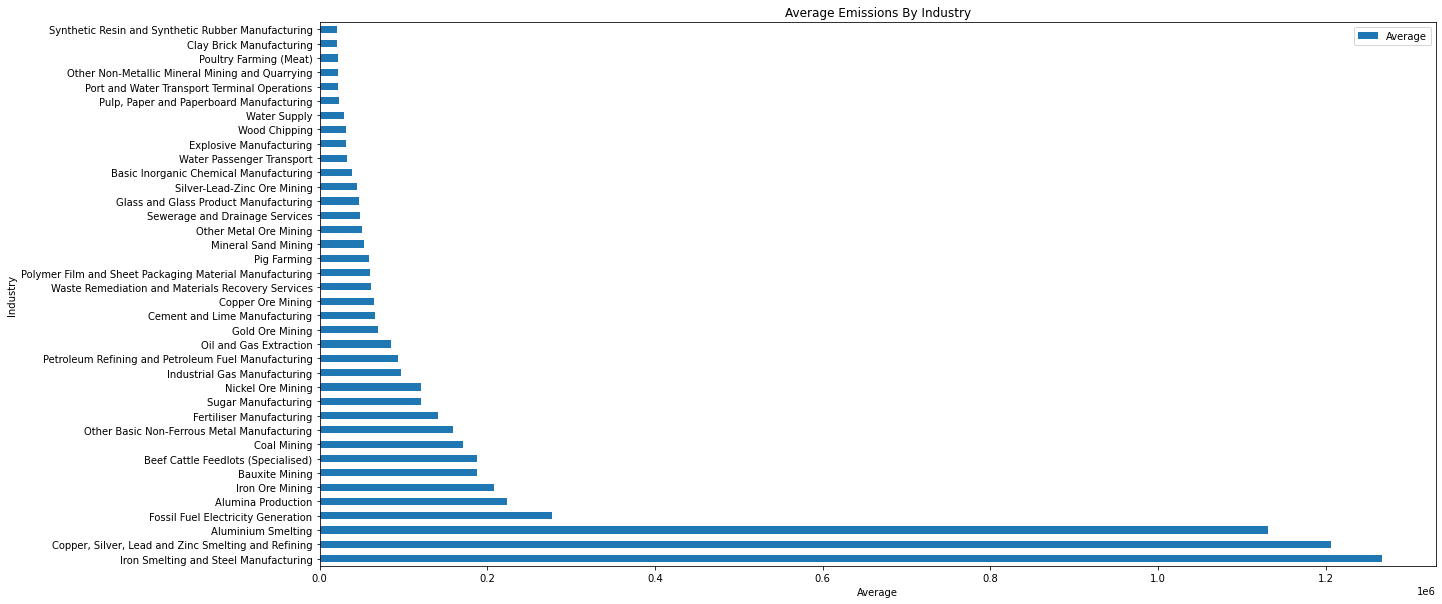

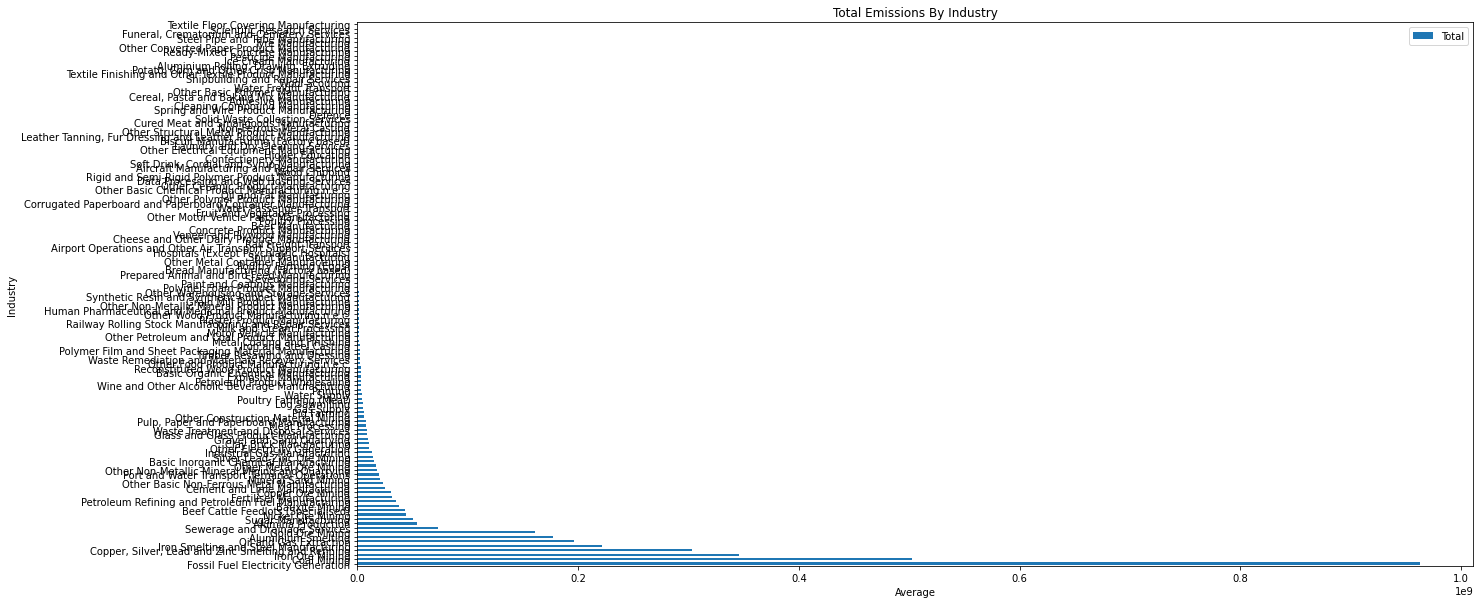

In [74]:
dataheading = 'primary_anzsic_class_name'
year = '2016/2017'
len_dataset_rows_temp = 0
dict_emissions_by_industry = {}
industry_list = []
average_list = []
total_list = []

df_emissions_by_industry_average = {}
df_emissions_by_industry_total = {}

def append_value(append_from_this_heading, row_number, to_dictionary):
    if row_number['report_year'] == year:
        try: #Turn this into a function
            if not pd.isna(row_number[append_from_this_heading]):
                appendthis = float(row_number[append_from_this_heading])
                to_dictionary[row_number[dataheading]].append(appendthis)
        except ValueError:
            print("NG")

for x in emissions_data["report_year"]:
    len_dataset_rows_temp += 1
    if x == year:
        len_dataset_rows = len_dataset_rows_temp


for x in range(0, len_dataset_rows):
    rows = emissions_data.iloc[x]
    if rows['report_year'] == year:
        if rows[dataheading] not in dict_emissions_by_industry:
            dict_emissions_by_industry[rows[dataheading]] = []
        

        append_value("air_total_emission_kg", rows, dict_emissions_by_industry)
        append_value("water_emission_kg", rows, dict_emissions_by_industry)
        append_value("land_emission_kg", rows, dict_emissions_by_industry)

    

        
for x in dict_emissions_by_industry:
    industry_list.append(x)

    average_emissions = int(sum(dict_emissions_by_industry[x])/len(dict_emissions_by_industry[x]))
    total_emissions = int(sum(dict_emissions_by_industry[x]))

    average_list.append(average_emissions)
    total_list.append(total_emissions)


df_emissions_by_industry_average["Industry"] = industry_list
df_emissions_by_industry_average["Average"] = average_list

df_emissions_by_industry_total["Industry"] = industry_list
df_emissions_by_industry_total["Total"] = total_list

try:
    print(df_emissions_by_industry_average["Laundry and Dry-Cleaning Services"])
except Exception as e:
    print("Error")

print("AVERAGE")
df_average=pd.DataFrame(df_emissions_by_industry_average)
average_sort = df_average.sort_values(by="Average", ascending=False)
is_top = average_sort["Average"] >= 20000
#print(average_sort[is_top])
average_sort[is_top].plot(x ="Industry", y="Average", kind = "barh", figsize=(20,10))
plt.title("Average Emissions By Industry")
plt.xlabel("Average")
plt.ylabel("Industry")

df_total=pd.DataFrame(df_emissions_by_industry_total)
total_sort = df_total.sort_values(by="Total", ascending=False)
for x in total_sort:
    print(x)
is_top = total_sort["Total"] >= 20000
#print(total_sort[is_top])
total_sort[is_top].plot(x = "Industry", y="Total", kind = "barh", figsize=(20,10))
plt.title("Total Emissions By Industry")
plt.xlabel("Average")
plt.ylabel("Industry")